In [5]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

data = pd.read_csv("transformed_data.csv")

# Data Preparation

In [6]:
# level of data is simply what each row represent
data.head(10)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754
5,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754
6,AFG,Afghanistan,2020-01-06,0.498,0.0,0.0,0.0,17.477233,7.497754
7,AFG,Afghanistan,2020-01-07,0.498,0.0,0.0,0.0,17.477233,7.497754
8,AFG,Afghanistan,2020-01-08,0.498,0.0,0.0,0.0,17.477233,7.497754
9,AFG,Afghanistan,2020-01-09,0.498,0.0,0.0,0.0,17.477233,7.497754


In [7]:
# Check the size of datasets
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB


In [4]:
# Check what is range of time in data
# Convert variable into date column and check min and max
data['DATE']=pd.to_datetime(data['DATE'],format = '%Y-%m-%d')
data['DATE'].agg(['min', 'max'])

min   2019-12-31
max   2020-10-19
Name: DATE, dtype: datetime64[ns]

In [9]:
# Check the count of Country variable in "data" and deduce some statistical observations based on the distribution
data['COUNTRY'].value_counts()

Afghanistan        294
Indonesia          294
Macedonia          294
Luxembourg         294
Lithuania          294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

# Data Analysis

For every country combination, aggregate
1. Average HDI
2. Average STI
3. Average GDPCAP
4. Total Cases
5. Total deaths
6. Total Population


In [10]:
data.groupby(['COUNTRY']).nunique()

,CODE,DATE,HDI,TC,TD,STI,POP,GDPCAP
COUNTRY,,,,,,,,
Afghanistan,1,294,1,203,158,17,1,1
Albania,1,225,1,224,149,16,1,1
Algeria,1,294,1,226,217,17,1,1
Andorra,1,226,1,115,40,12,1,1
Angola,1,212,1,150,94,13,1,1
...,...,...,...,...,...,...,...,...
Venezuela,1,219,1,194,128,11,1,1
Vietnam,1,294,1,145,21,25,1,1
Yemen,1,193,1,153,134,7,1,1


In [11]:
# Create a dataframe from the aggregated table on country level above
agg_data = data.groupby(['COUNTRY','CODE']).agg({'HDI':np.mean,'STI':np.mean,'GDPCAP':np.mean,'TC':np.sum,'TD':np.sum,'POP':np.sum}).reset_index()
agg_data.head()

,COUNTRY,CODE,HDI,STI,GDPCAP,TC,TD,POP
0,Afghanistan,AFG,0.498,3.049673,7.497754,2000.646094,1226.948181,5138.306531
1,Albania,ALB,0.785,3.927348,9.376146,1702.240756,929.368800,3346.320751
2,Algeria,DZA,0.754,3.195168,9.540639,2052.510847,1406.216387,5173.314864
3,Andorra,AND,0.858,3.483320,0.000000,1465.828250,786.655112,2543.629175
4,Angola,AGO,0.581,4.112616,8.668969,1203.978763,590.138675,3669.286969


In [12]:
# Sort aggregated data on basis of total covid counts
sorted_data = agg_data.sort_values(by=['TC'],ascending=False)
sorted_data.head()

,COUNTRY,CODE,HDI,STI,GDPCAP,TC,TD,POP
200,United States,USA,0.924,3.350949,10.900906,3343.050755,2480.576064,5767.585257
41,China,CHN,0.752,3.892554,9.636177,3128.587021,2205.740166,6199.707137
27,Brazil,BRA,0.759,3.136028,9.554175,2913.256895,2166.965888,5637.371232
97,Italy,ITA,0.880,3.629838,10.469372,2873.314489,2327.710204,5267.751697
178,Spain,ESP,0.891,3.405506,10.442094,2843.820343,2197.919025,5174.505146


In [13]:
# Filter the data for 10 countries who have highest cases and use that in every analysis afterwards
top_10 = sorted_data.head(10)
print(top_10)

            COUNTRY CODE    HDI       STI     GDPCAP           TC  \
200   United States  USA  0.924  3.350949  10.900906  3343.050755   
41            China  CHN  0.752  3.892554   9.636177  3128.587021   
27           Brazil  BRA  0.759  3.136028   9.554175  2913.256895   
97            Italy  ITA  0.880  3.629838  10.469372  2873.314489   
178           Spain  ESP  0.891  3.405506  10.442094  2843.820343   
90            India  IND  0.640  3.610552   8.768212  2825.623737   
199  United Kingdom  GBR  0.922  3.353883  10.590447  2809.857646   
73          Germany  DEU  0.936  3.284516  10.719499  2804.510066   
92             Iran  IRN  0.798  3.207064   9.856533  2803.718251   
68           France  FRA  0.901  3.385794  10.561154  2801.434702   

              TD          POP  
200  2480.576064  5767.585257  
41   2205.740166  6199.707137  
27   2166.965888  5637.371232  
97   2327.710204  5267.751697  
178  2197.919025  5174.505146  
90   1933.999000  6187.333638  
199  2209.519314

In [14]:
# Analyze the spread of data using country , total cases and total deaths

<function matplotlib.pyplot.show(close=None, block=None)>

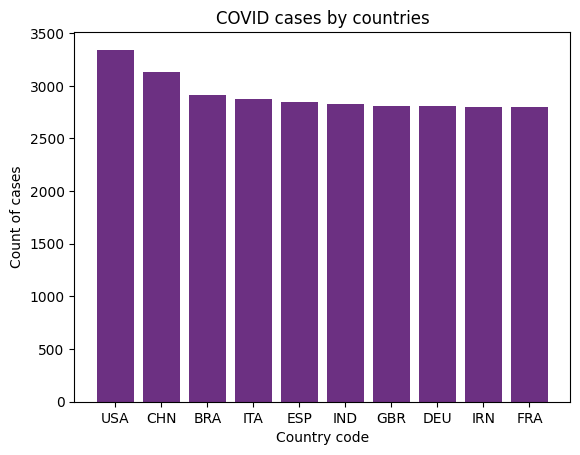

In [17]:
#Plot of country and COVID cases
plt.bar(top_10 ['CODE'], top_10 ['TC'], color='#6c3082')
plt.title('COVID cases by countries')
plt.xlabel('Country code')
plt.ylabel('Count of cases')
plt.show

In [16]:
fig2=px.bar(top_10, y = 'TC', x='COUNTRY', title='Country with highest COVID cases')
fig2.show()

<function matplotlib.pyplot.show(close=None, block=None)>

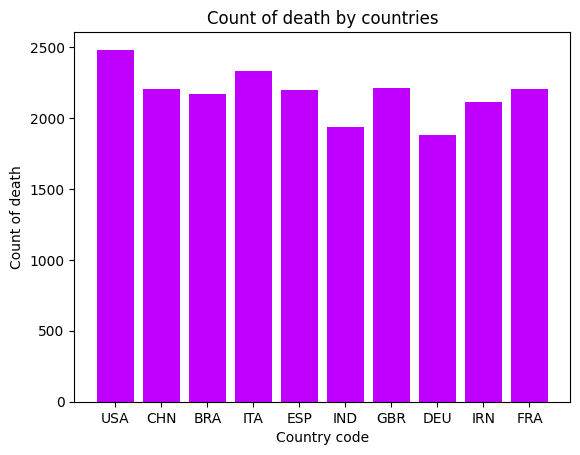

In [18]:
#Plot of country and death counts
plt.bar(top_10 ['CODE'], top_10 ['TD'], color='#bf00ff')
plt.title('Count of death by countries')
plt.xlabel('Country code')
plt.ylabel('Count of death')
plt.show

In [19]:
fig3=px.bar(top_10, y = 'TD', x='COUNTRY', title='Country with highest death')
fig3.show()

In [20]:
#Plot Percentage of Total Cases and Deaths
total_cases = top_10['TC'].sum()
total_deaths = top_10['TD'].sum()
print(total_cases)
print(total_deaths)

29147.173904835
21721.274350396


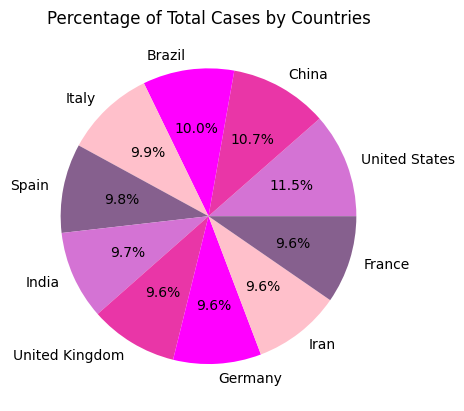

In [21]:
TC_prc = (top_10['TC']/total_cases)*100
TD_prc = (top_10['TD']/total_deaths)*100
plt.pie(TC_prc,labels=top_10['COUNTRY'],autopct='%1.1f%%',colors=['#d473d4','#e936a7','magenta','pink','#86608e'])
plt.title('Percentage of Total Cases by Countries')
plt.show()

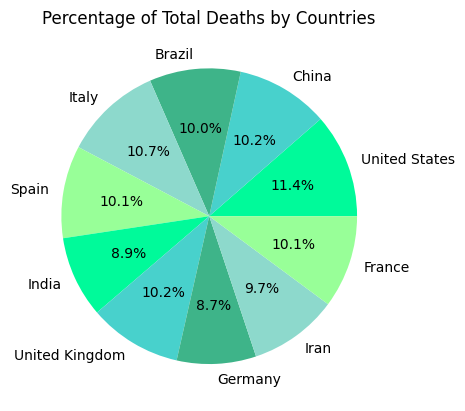

In [22]:
plt.pie(TD_prc,labels=top_10['COUNTRY'],autopct='%1.1f%%',colors=['#00fa9a','#48d1cc','#3eb489','#8dd9cc','#98ff98'])
plt.title('Percentage of Total Deaths by Countries')
plt.show()

In [ ]:
#Print the death rate from data
death_rate = (total_deaths/total_cases)*100
print(death_rate)

74.52274591463163


In [23]:
#Check the spread of stringency index
#It is a composite measure of response indicators, including school closures, workplace closures, and travel bans.
#It shows how strictly countries are following these measures to control the spread of covid-19
fig = px.bar(top_10, x="COUNTRY", y="STI", color="STI", title="Spread of stringency index")
fig.show()

In [24]:
#Check the trend of HDI on data
#It is a statistic composite index of life expectancy, education, and per capita indicators.
fig1 = px.line(top_10, x="COUNTRY", y="HDI", title="Trend of HDI")
fig1.show()